This project closely follows [this tutorial.](https://towardsdatascience.com/sarcasm-detection-step-towards-sentiment-analysis-84cb013bb6db)

**Introduction**


With the advent and rise of social media, automated moderation becomes more and more necessary. However, the extent of moderation is always a sensitive issue and needs to be dealt with sensitively. 

Sentiment analysis can help with this, to some extent, but it more or less always fails to detect sarcasm – where a sentence may be worded negatively to express a positive emotion, or vice-versa. An auto-moderation system based simply on basic sentiment analysis may fail to recognise sarcasm and may increase the load of the human overseeing the system rather than decrease it. 

This program is, therefore, an attempt at identifying sarcasm in language – a small first step in what may be the development of a fully-fledged system that can handle moderation requests and make the Internet a safer and happier place for the world to interact with. 



**Table of Contents**


**1. Overview**

- Problem Statement
- Objective and Scope of the Project
- Data Sources
- Tools and Techniques
- Analytics Approach
- Limitations

**2. Data Description and Preparation**

- Data Management
- Data Table
- Data Quality
- Data Preparations

**3. Predictive Model Development**

- Development of Regression Models 
- Validation
- Conclusion
- Recommendations




**1. Overview**

It is known that basic sentiment analysis based on recognising positive and negative words is not enough to correctly identify a statement as being positive or negative in nature. It is, therefore, incredibly important to also incorporate sarcasm detection in such a system. 

To be able to detect sarcasm in a statement, we can use headlines from The Onion – a sarcastic news source, and another legitimate one. In the data source used, the other, serious, headlines have been taken from The Huffington Post. 

Linear and Logistic Regression have been applied to the dataset after vectorising it to identify sarcasm. 



- **Problem Statement:**

  It is a well-known problem that simple sentiment analysis systems will not be able to detect sarcasm. It is, therefore, imperative to include a sentiment analysis module with it to make it more complete. 

  Through this project, we aim to be able to identify sarcastic headlines from serious ones. This may be the first step in building a more complete sentiment analysis system. 

  Such a complete system may aid in various auto-moderation techniques, automated reply techniques, or even a complete chatbot capable of handling a specific domain-related task. 



- **Objective and Scope of the Project**

  - Objective:<br>
    - The primary objective of the study is to make a model capable of identifying sarcasm in statements. 

  - Scope:<br>
    - The scope of the study covers news headlines, taken from The Onion and from The Huffington Post.
    - The study’s focus is on finding which statements are more likely to be sarcastic based on the words they are comprised of. 

  - Out of Scope:<br>
    - Simple sentiment analysis. 
    - In-depth sarcasm analysis capable of analysing all sorts of statements.
    - Identifying fake news.
    

- **Data Source**
  
  The data for the project was obtained from Kaggle. This News Headlines Dataset for Sarcasm Detection is collected from The Onion website which aims at producing sarcastic versions of current events and The Huffington Post website which collects real news headlines.
  
  The columns of the dataset are:
  1.	article_link  - links to the news articles.
  2.	headline  - headlines of the news articles.
  3.	is_sarcastic - 0(for serious text) and 1(for sarcastic text).
  

- **Tools & Techniques**

  We have used the following Analytical techniques / methodology for analyzing the Data :
  1.	Term Frequency-Inverse Document Frequency (TF-IDF) Vectorisation of the data
  2.	Linear Regression
  3.	Logistic Regression
  4.	Plotting the various results together. 
  

- **Analytics Approach**

  The Analytical Approach will involve the following (not necessarily in the order) activities:
  - Data extraction from Primary Data source
  - Data quality check
  - Data cleaning and data preparation
  - Term Frequency-Inverse Data Frequency Vectorisation
  - Study the variables for its relevance for the study
  - Identifying X and y variables for regression.
  - Division of data into train and test
  - Model Development
  - Final Model
  - Checking and plotting the accuracy of the model
  - Intervention Strategies and recommendations
  

- **Limitations**

  There are few limitations that this study has w.r.t data and the methodology that can be used.

  It is not possible to collect or to predict accurately if data is sarcastic automatically. Hence, we have to use data from a reliable source. One of the best known such sources is The Onion, known for its sarcastic headlines and news articles. Once we have that, we can collect headlines from another reputable news source to provide serious headlines. 

  We also cannot collect more sorts of sarcastic data, such as jokes, tweets, stories, and social media posts. 



**2. Data Description and Preparation**

- **Data Management**
  
  All the necessary modules and the data source are first imported into the work environment. 

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset, and checking that it has been properly imported
data = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)

- **Data Table**

  The data imported is checked and presented in tabular form. 
  

In [3]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


- **Data Quality**

  The data imported has punctuation in the strings. This is detrimental to our analysis and must be removed before further work is done. 
  
  
  
- **Data Preparation**

  - Variables Transformation

    1.	The re module for regular expressions in Python was used to remove all the punctuation from the sentences. 
    2.	The PorterStemmer module is used to convert all words in the headlines to a root word, so that different forms of the same word are not analysed twice. 
    3.	TF-IDF Vectorisation to convert the words into meaningful numbers so regression techniques may be applied. 

  - Missing Values

    1.	No specific missing value treatment was used
    2.	Missing values were checked for and removed before the project was started. 

  

In [4]:
# Checking for null values
data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

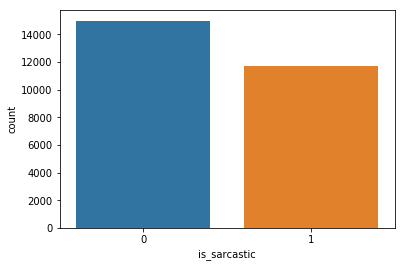

In [5]:
sns.countplot(data['is_sarcastic'], label = "Sarcastic vs. Serious")

In [6]:
# Removing punctuation and checking if the changes have taken
data['headline'] = data['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the roseanne revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son s web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,boehner just wants wife to listen not come up...,1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j k rowling wishes snape happy birthday in th...,0


In [7]:
# Identifying independent and dependent variables
features = data['headline'] # Independent
labels = data['is_sarcastic'] # Dependent
print("Features:")
print(features)
print()
print("Labels")
print(labels)

Features:
0        former versace store clerk sues over secret  b...
1        the  roseanne  revival catches up to our thorn...
2        mom starting to fear son s web series closest ...
3        boehner just wants wife to listen  not come up...
4        j k  rowling wishes snape happy birthday in th...
5                              advancing the world s women
6           the fascinating case for eating lab grown meat
7        this ceo will send your kids to school  if you...
8        top snake handler leaves sinking huckabee camp...
9        friday s morning email  inside trump s presser...
10       airline passengers tackle man who rushes cockp...
11       facebook reportedly working on healthcare feat...
12       north korea praises trump and urges us voters ...
13       actually  cnn s jeffrey lord has been  indefen...
14       barcelona holds huge protest in support of ref...
15       nuclear bomb detonates during rehearsal for  s...
16       cosby lawyer asks why accusers didn t

In [8]:
# Converting all the words to the corresponding root word
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : " ".join([ps.stem(word) for word in x]))
features

0        former versac store clerk sue over secret blac...
1        the roseann reviv catch up to our thorni polit...
2        mom start to fear son s web seri closest thing...
3        boehner just want wife to listen not come up w...
4        j k rowl wish snape happi birthday in the most...
5                                 advanc the world s women
6                   the fascin case for eat lab grown meat
7        thi ceo will send your kid to school if you wo...
8             top snake handler leav sink huckabe campaign
9        friday s morn email insid trump s presser for ...
10       airlin passeng tackl man who rush cockpit in b...
11       facebook reportedli work on healthcar featur a...
12       north korea prais trump and urg us voter to re...
13       actual cnn s jeffrey lord ha been indefens for...
14        barcelona hold huge protest in support of refuge
15       nuclear bomb deton dure rehears for spider man...
16       cosbi lawyer ask whi accus didn t come forward.

In [9]:
# Performing TF-IDF Vectorisation on the features
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**3. Predictive Model Development**

 The headline statements were extracted as the “features” or the independent variables, and the values for whether or not the headline is sarcastic were extracted as the “labels” or the dependent variables.
 
Then, various classification techniques were applied and their efficiencies found out. 


In [10]:
# Splitting into training and testing subsets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = .05, random_state = 0)

In [11]:
# Performing Logistic Regression and printing scores
logr = LogisticRegression(solver='lbfgs')
logr.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# Checking classification report for Logistic Regression
labels_pred = logr.predict(features_test)
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       746
           1       0.82      0.80      0.81       590

   micro avg       0.83      0.83      0.83      1336
   macro avg       0.83      0.83      0.83      1336
weighted avg       0.83      0.83      0.83      1336



In [13]:
# Performing Decision Tree Classification
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(features_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# Checking classification report for Decision Tree
labels_pred = dtree.predict(features_test)
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       746
           1       0.71      0.71      0.71       590

   micro avg       0.74      0.74      0.74      1336
   macro avg       0.74      0.74      0.74      1336
weighted avg       0.74      0.74      0.74      1336



In [15]:
# Performing Random Forest Classification
randomforest = RandomForestClassifier(n_estimators=150)
randomforest.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# Checking classification report for Random Forest Classifier
labels_pred = randomforest.predict(features_test)
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       746
           1       0.79      0.81      0.80       590

   micro avg       0.82      0.82      0.82      1336
   macro avg       0.82      0.82      0.82      1336
weighted avg       0.82      0.82      0.82      1336



In [17]:
# Performing Naive Bayes classification
naivebayes = GaussianNB()
naivebayes.fit(features_train,labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Checking classification report for Naive Bayes
labels_pred = naivebayes.predict(features_test)
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74       746
           1       0.66      0.83      0.74       590

   micro avg       0.74      0.74      0.74      1336
   macro avg       0.75      0.75      0.74      1336
weighted avg       0.76      0.74      0.74      1336



In [19]:
# Performing Linear Support Vector Classification
lsvc = LinearSVC()
lsvc.fit(features_train, labels_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
# Checking classification report for Linear Support Vector Classification
labels_pred = lsvc.predict(features_test)
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       746
           1       0.82      0.81      0.82       590

   micro avg       0.84      0.84      0.84      1336
   macro avg       0.84      0.83      0.84      1336
weighted avg       0.84      0.84      0.84      1336



Since the classification is done best by Logistic Regression and LSVC, we can now write the code to take a headline as input and predict whether it is sarcastic or not. 

Some sample statements to test out: 
 - 10,000+ migrants displaced in India amid COVID-19 lockdown 
 - Camera operator with unusual name noticed in credits for third episode in row
 - Child enchanted by bidet

In [21]:
X = input("Enter a headline to be checked for sarcasm: ")
X = re.sub('[^a-zA-Z]', ' ', X)
X = " ".join([ps.stem(i) for i in X.lower().split()])
X = tv.transform([X]).toarray()

def predict(text):
    return "Sarcastic." if logr.predict(text)[0] == 1 else "Serious."

print(predict(X))

Enter a headline to be checked for sarcasm: Camera operator with unusual name noticed in credits for third episode in row
Sarcastic.


In [22]:
def predict2(text):
    return "Sarcastic." if lsvc.predict(text)[0] == 1 else "Serious."

print(predict2(X))

Sarcastic.
